In [24]:
import os
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from skimage import io # pip install scikit-image
from skimage import img_as_float

from ipywidgets import IntProgress
from IPython.display import display # pip install notebook ipywidgets

## Read Image

In [25]:
# Use the Lena image as input.
# Read in and convert to float 0.0 - 1.0
f = io.imread('lena_std.tif')
fileInput = img_as_float(f)
fileInput.shape

(512, 512, 3)

## Preprocessing

In [33]:
width = fileInput.shape[0]
height = fileInput.shape[1]
data = []
for i in range(width):
    for j in range(height):
        data.append([i,j,fileInput[i][j]])
# random choose 5000 points from the image
sample = np.random.choice(len(data), 5000)
train = [data[index] for index in sample]

In [11]:
train_X = [[i[0],i[1]] for i in train]
train_Y_R = [i[2][0] for i in train]
train_Y_G = [i[2][1] for i in train]
train_Y_B = [i[2][2] for i in train]
train_Y = [[i[2][0], i[2][1], i[2][2]] for i in train]
depths = [1,2,3,5,10,15]
trees = [1,3,5,10,100]

## random forest with single decision tree
with depth 1,2,3,5,10,15

The current depth is 1


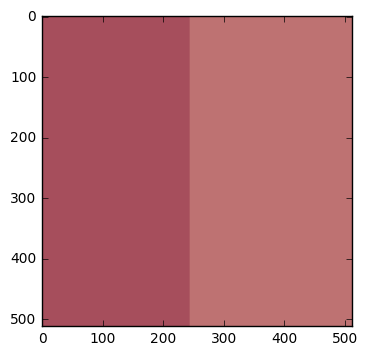

The current depth is 2


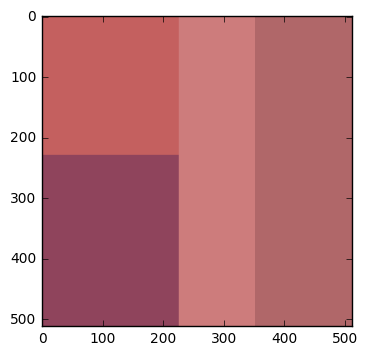

The current depth is 3


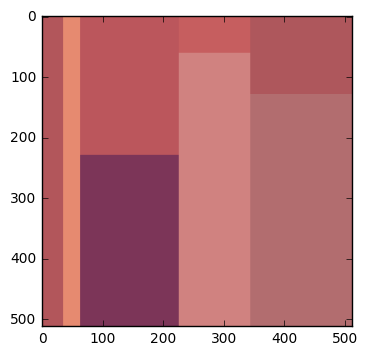

The current depth is 5


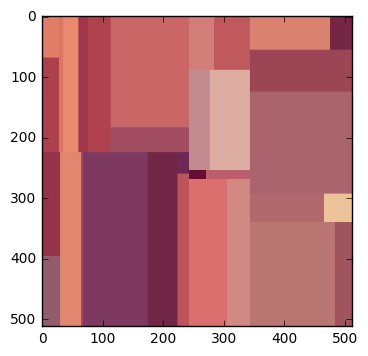

The current depth is 10


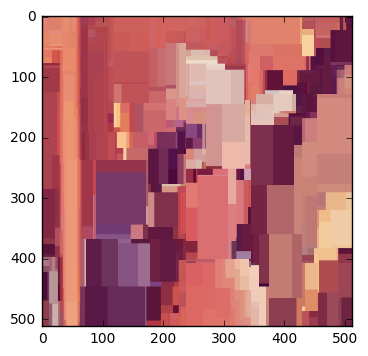

The current depth is 15


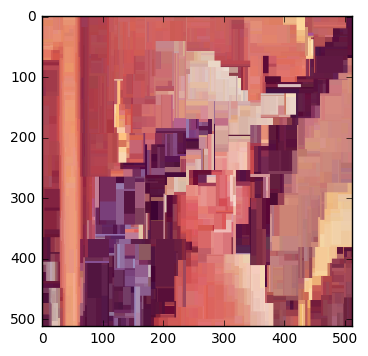

In [12]:
# n_estimator : The number of trees in the forest.
for depth in depths:
    print("The current depth is "+str(depth))
    clf = RandomForestRegressor(n_estimators=1, n_jobs=-1, max_depth=depth)
    clf = clf.fit(train_X, train_Y)
    testing_Y = []
    
    for i in range(fileInput.shape[0]):
        temp = []
        for j in range(fileInput.shape[1]):
            color = clf.predict([[i,j]])[0]
            temp.append(color)
        testing_Y.append(temp)
        
    testing_Y = np.array(testing_Y)

    import matplotlib.pyplot as plt
    plt.imshow(testing_Y)
    plt.savefig('depth_'+str(depth)+'.png')
    plt.show()

## random forest with different num of regression tree
Repeat the experiment for a random forest of depth 7,but with number of trees equal to 1, 3, 5, 10, and 100. 

Now tree is 1


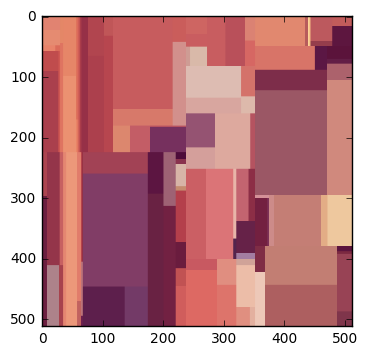

Now tree is 3


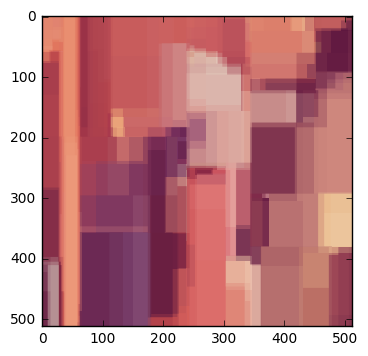

Now tree is 5


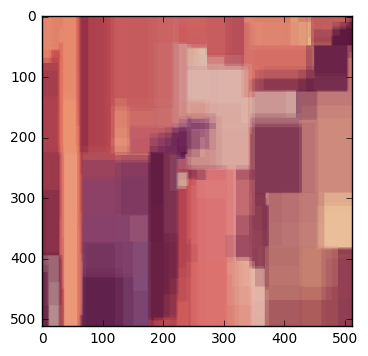

Now tree is 10


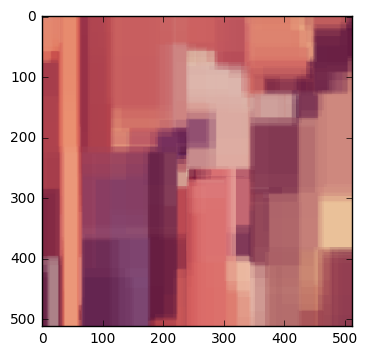

Now tree is 100


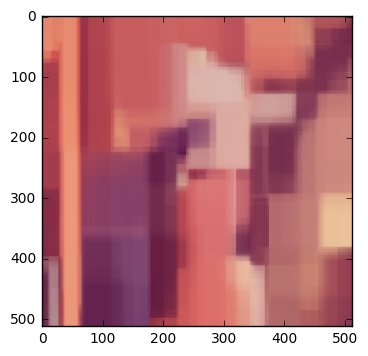

In [15]:
for tree in trees:
    print('Now tree is '+str(tree))
    clf = RandomForestRegressor(n_estimators=tree, n_jobs=1, max_depth=7)
    clf = clf.fit(train_X, train_Y)
    
    testing_Y = []

    for i in range(fileInput.shape[0]):
        temp = []
        for j in range(fileInput.shape[1]):
            color = clf.predict([[i,j]])[0]
            temp.append(color)
        testing_Y.append(temp)
        
    testing_Y = np.array(testing_Y)

    import matplotlib.pyplot as plt
    plt.imshow(testing_Y)
    plt.savefig('tree_'+str(tree)+'.png')
    plt.show()

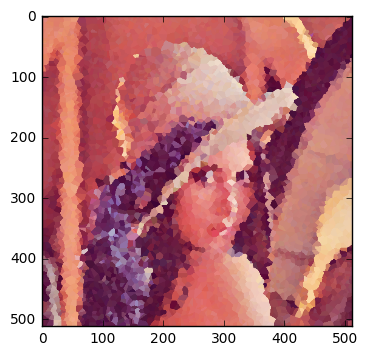

In [17]:
from sklearn.neighbors import KNeighborsRegressor
# k-NN regressor k = 1
clf = KNeighborsRegressor(n_neighbors=1)
clf.fit(train_X, train_Y)
testing_Y = []

for i in range(fileInput.shape[0]):
    temp = []
    for j in range(fileInput.shape[1]):
        color = clf.predict([[i,j]])[0]
        temp.append(color)
    testing_Y.append(temp)

testing_Y = np.array(testing_Y)
import matplotlib.pyplot as plt
plt.imshow(testing_Y)
plt.savefig('kNN_1.png')
plt.show()